In [2]:
import numpy as np
import matplotlib.pyplot as plt

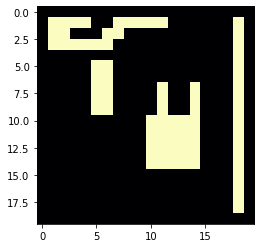

In [3]:
image = np.zeros((20,20), dtype="int32")
image[1:-1, -2] = 1

image[1, 1:5] = 1
image[1, 7:12] = 1
image[2, 1:3] = 1
image[2, 6:8] = 1
image[3:4, 1:7] = 1

image[7:11, 11] = 1
image[7:11, 14] = 1
image[10:15, 10:15] = 1

image[5:10, 5] = 1
image[5:10, 6] = 1
plt.imshow(image, cmap='magma')
plt.show()

In [4]:
def neighbours2(B, y, x):
    left = y, x-1
    top = y-1, x
    
    if not check(B, *left):
        left = None
    if not check(B, *top):
        top = None
    return left, top

In [5]:
def check(B, y, x):
    if not 0 <= x< B.shape[1]:
        return False
    if not 0 <= y< B.shape[0]:
        return False
    if B[y, x] != 0:
        return True
    return False

In [6]:
def find(label, linked):
    j = label 
    while linked[j] != 0:
        j = linked[j]
    return j

In [7]:
def union(label1, label2, linked):
    j = find(label1, linked)
    k = find(label2, linked)
    if j != k:
        linked[k] = j

#### были добавлены 2 следующих блока

In [12]:
def remarke(image):
    prev=[]
    for i in range(1,np.max(image)+1):
        if i in image:
            prev.append(i)
    
    new=[i for i in range(1,len(prev)+1)]

    for p, n in zip(prev, new):
        image = recolor(image, p, n)
    return image

In [13]:
def recolor(image, prev_c, next_c):
    if prev_c != next_c:
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                if image[y,x] == prev_c:
                    image[y,x] = next_c
    return image

#### конец

In [14]:
def two_pass_label(B):
    labeled = np.zeros_like(B)
    linked = np.zeros(len(B), dtype="uint16")
    label = 1
    
    for y in range(B.shape[0]):
        for x in range(B.shape[1]):
            if B[y, x] != 0:
                n = neighbours2(B, y, x)
                if n[0] is None and n[1] is None:
                    m = label
                    label+=1
                else:
                    labels = [labeled[i] for i in n if i is not None]
                    m = min(labels)
                    
                labeled[y, x] = m
                
                for i in n:
                    if i is not None:
                        lb = labeled[i]
                        if lb != m:
                            union(m, lb, linked)
                            
    for y in range(B.shape[0]):
        for x in range(B.shape[1]):
            if B[y, x] != 0:
                new_label = find(labeled[y, x], linked)
                if new_label != labeled[y, x]:
                    labeled[y, x] = new_label

    
    return remarke(labeled)

&lt;matplotlib.colorbar.Colorbar at 0x7f81715fb4f0&gt;

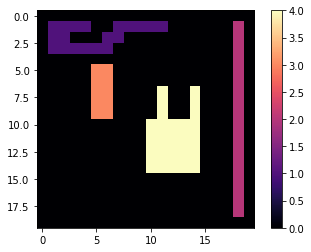

In [15]:
labeled = two_pass_label(image)
plt.imshow(labeled, cmap='magma')
plt.colorbar()